Trabajo Práctico Final: Redes Neuronales Convolucionales en TensorFlow
📑 Consigna
Identificar un problema de clasificación de imagenes que puedan resolver utilizando una red neuronal convolucional implementada en Keras utilizando TensorFlow como vimos en clase Desarrollar un modelo para resolver en un Python Notebook, donde diseñen una red e implementen como adaptar los datos de entrada a una matriz, para pasarla por un modelo creado con Keras. Ademas en el mismo notebook deberán:

Explicar el problema a resolver y la solución propuesta
Identificar y explicar los conceptos teóricos vistos en clase sobre modelado y entrenamiento de redes neuronales. Tip: visualizar el modelo con algún paquete como keras-visualizer para explicar su comportamiento.
Visualizar los datos de entrada, ejemplos tomados del dataset, y algunos ejemplos de salida.
Se puede optar por resolver el problema con el dataset de Fashion MNIST. Este ya viene cargado en Google Colab. Pueden encontrar otros datasets en Kaggle o directamente de internet.

El trabajo se puede resolver de hasta 4 integrantes.

🔋 Bonus
Usando Streamlit deployar el modelo para que se pueda utilizar.

📅 Fecha de entrega:
📝 Formato de entrega
Entregar link al repo de GitHub donde hayan estado trabajando el Python Notebook con toda la explicación, justificación y desarrollo del trabajo. Se evaluarán los mismos conceptos del Trabajo Práctico pasado, prolijidad y explicación del código. De querer compartir el dataset, integrar el link al dataset, no los datos en si, ya que se deben visualizar algunas muestras en el notebook.

Link al forms para la entrega: Google Forms

In [17]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


El objetivo de esta red Neuronal es determianr de que tipo en una carta (https://www.kaggle.com/datasets/gpiosenka/cards-image-datasetclassification)

In [2]:
import tensorflow as tf
import numpy as np


In [3]:
from tensorflow import keras


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [5]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)

Transformar las imagenes en tensores para poder utilizarlas en el modelo

In [7]:
train_generator = train_datagen.flow_from_directory(
        'train',  # Reemplaza esto con la ruta a tu directorio principal
        target_size=(224, 224),  
        batch_size=32,
        class_mode='categorical')  

Found 7624 images belonging to 53 classes.


In [8]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
valid_generator = valid_datagen.flow_from_directory(
        'valid',  # Reemplaza esto con la ruta a tu directorio principal
        target_size=(224, 224),  
        batch_size=32,
        class_mode='categorical')  

Found 265 images belonging to 53 classes.


In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
test_generator = valid_datagen.flow_from_directory(
        'test',  # Reemplaza esto con la ruta a tu directorio principal
        target_size=(224, 224),  
        batch_size=32,
        class_mode='categorical')  

Found 265 images belonging to 53 classes.


Definir las capas del modelo segun lo que me sirva en base a distintas pruebas y tambien la cantidad de capas que tiene ya que me afectan el rendimiento

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(53, activation='softmax')
])

Configuro el proceso de aprendizaje del modelo segun mi problema como la loss de 'categorical_crossentropy' que segun lo que vi se usa para los problemas multiclase, adam pq es eficiente y usa menos memoria q los otros y accuracy por las predicciones

In [13]:

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Fit el modelo, todos los hiperparametros como los epoch fueron testeados con numeros un poco mas grandes pero estos demoraban mucho y relentizxaban el modelo

a doferencia del otro trabajo los W se ajustan solos con la funcion .fit() y no hace falta ajustarlos

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=50,  
    epochs=10,  
    validation_data= valid_generator,
    validation_steps=25)  

Epoch 1/10


50/50 [==============================] - 47s 927ms/step - loss: 26.8942 - accuracy: 0.0237 - val_loss: 3.9803 - val_accuracy: 0.0377
Epoch 2/10
50/50 [==============================] - 44s 880ms/step - loss: 3.7917 - accuracy: 0.0926
Epoch 3/10
50/50 [==============================] - 44s 883ms/step - loss: 3.3578 - accuracy: 0.2037
Epoch 4/10
50/50 [==============================] - 44s 882ms/step - loss: 2.7585 - accuracy: 0.3509
Epoch 5/10
50/50 [==============================] - 44s 884ms/step - loss: 2.2034 - accuracy: 0.4600
Epoch 6/10
50/50 [==============================] - 44s 885ms/step - loss: 1.8484 - accuracy: 0.5581
Epoch 7/10
50/50 [==============================] - 44s 884ms/step - loss: 1.5275 - accuracy: 0.6444
Epoch 8/10
50/50 [==============================] - 44s 881ms/step - loss: 1.2893 - accuracy: 0.6973
Epoch 9/10
50/50 [==============================] - 44s 879ms/step - loss: 1.1881 - accuracy: 0.7069
Epoch 10/10
50/50 [===========================

evaluar modelo en totalidad viendo perdida y accuracy con un total de mas o menos 56% de accuracy

In [1]:
weights = model.get_weights()

NameError: name 'model' is not defined

In [15]:
test_loss, test_acc = model.evaluate(test_generator)

9/9 [==============================] - 1s 94ms/step - loss: 1.8054 - accuracy: 0.5509


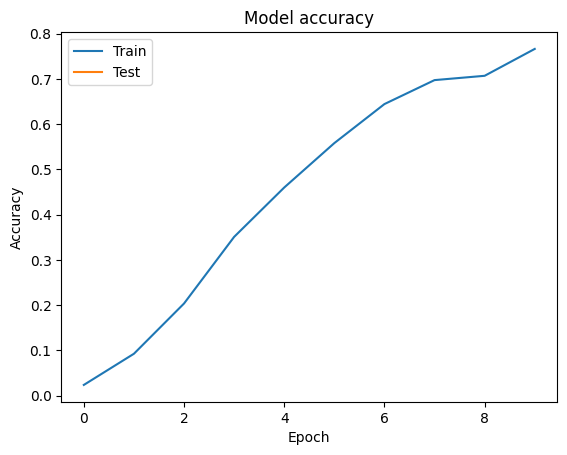

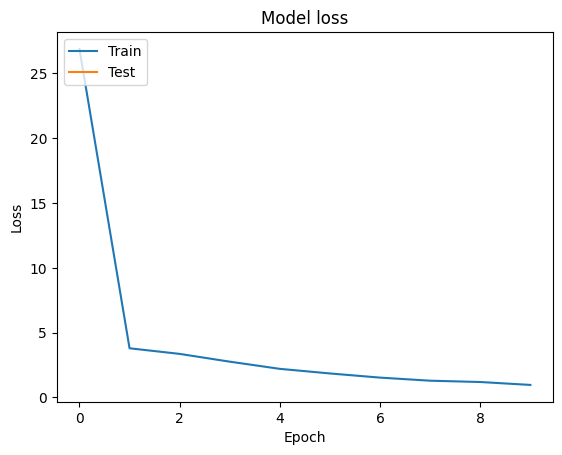

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

creo grafico como archivo .gv

In [32]:
from keras_visualizer import visualizer 

visualizer(model, view=True)

In [34]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
